### This is a PROMISE Software Engineering Repository data set made publicly available in order to encourage repeatable, verifiable, refutable, and/or improvable predictive models of software engineering.

If you publish material based on PROMISE data sets then, please
follow the acknowledgment guidelines posted on the PROMISE repository
web page http://promise.site.uottawa.ca/SERepository .

## _Abstract_

_Making decisions with a highly uncertain level is a critical problem
in the area of software engineering. Predicting software quality requires high
accurate tools and high-level experience. Otherwise, AI-based predictive models
could be a useful tool with an accurate degree that helps on the prediction
of software effort based on historical data from software development metrics.
In this study, we built a software effort estimation model to predict this effort
using a linear regression model. This statistical model was developed using a
non-parametric linear regression algorithm based on the K-Nearest Neighbours
(KNN). So, our results show the possibility of using AI methods to predict the
software engineering effort prediction problem with an coefficient of determination
of 76%_

In [13]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Formatação mais bonita para os notebooks
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)


In [14]:
df_desharnais = pd.read_csv('../Datasets/02.desharnais.csv',  header=0)
df_desharnais.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [15]:
df_desharnais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
id                 81 non-null int64
Project            81 non-null int64
TeamExp            81 non-null int64
ManagerExp         81 non-null int64
YearEnd            81 non-null int64
Length             81 non-null int64
Effort             81 non-null int64
Transactions       81 non-null int64
Entities           81 non-null int64
PointsNonAdjust    81 non-null int64
Adjustment         81 non-null int64
PointsAjust        81 non-null int64
Language           81 non-null int64
dtypes: int64(13)
memory usage: 8.3 KB


In [16]:
df_desharnais.describe()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,41.000000,41.000000,2.185185,2.530864,85.740741,11.666667,5046.308642,182.123457,122.333333,304.456790,27.629630,289.234568,1.555556
std,23.526581,23.526581,1.415195,1.643825,1.222475,7.424621,4418.767228,144.035098,84.882124,180.210159,10.591795,185.761088,0.707107
min,1.000000,1.000000,-1.000000,-1.000000,82.000000,1.000000,546.000000,9.000000,7.000000,73.000000,5.000000,62.000000,1.000000
25%,21.000000,21.000000,1.000000,1.000000,85.000000,6.000000,2352.000000,88.000000,57.000000,176.000000,20.000000,152.000000,1.000000
50%,41.000000,41.000000,2.000000,3.000000,86.000000,10.000000,3647.000000,140.000000,99.000000,266.000000,28.000000,255.000000,1.000000
75%,61.000000,61.000000,4.000000,4.000000,87.000000,14.000000,5922.000000,224.000000,169.000000,384.000000,35.000000,351.000000,2.000000
max,81.000000,81.000000,4.000000,7.000000,88.000000,39.000000,23940.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000,3.000000


## Applying Pearson’s correlation

In this section, the correlations between attributes of Desharnais dataset and software effort are analyzed and applicability of the regression analysis is examined. The correlation between two variables is a measure of how well the variables are related. The most common measure of correlation in statistics is the Pearson Correlation (or the Pearson Product Moment Correlation - PPMC) which shows the linear relationship between two variables. 

Pearson correlation coefficient analysis produces a result between `-1` and `1`. A result of `-1` means that there is a perfect negative correlation between the two values at all, while a result of `1` means that there is a perfect positive correlation between the two variables. 

Results between `0.5` and `1.0` indicate high correlation.Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficient. `Pearson’s correlation` (also called Pearson’s R) is a correlation coefficient commonly used in linear regression.

In [17]:
df_desharnais.corr()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
id,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
Project,1.000000,1.000000,-0.006007,0.214294,0.096486,0.255187,0.126153,0.265891,0.028787,0.226076,-0.207774,0.202608,0.391475
TeamExp,-0.006007,-0.006007,1.000000,0.424687,-0.210335,0.143948,0.119529,0.103768,0.256608,0.203805,0.235629,0.222884,-0.079112
ManagerExp,0.214294,0.214294,0.424687,1.000000,-0.011519,0.211324,0.158303,0.138146,0.206644,0.207748,-0.066821,0.187399,0.205521
YearEnd,0.096486,0.096486,-0.210335,-0.011519,1.000000,-0.095027,-0.048367,0.034331,0.001686,0.028234,-0.056743,0.012106,0.342233
Length,0.255187,0.255187,0.143948,0.211324,-0.095027,1.000000,0.693280,0.620711,0.483504,0.723849,0.266086,0.714092,-0.023810
Effort,0.126153,0.126153,0.119529,0.158303,-0.048367,0.693280,1.000000,0.581881,0.510328,0.705449,0.463865,0.738271,-0.261942
Transactions,0.265891,0.265891,0.103768,0.138146,0.034331,0.620711,0.581881,1.000000,0.185041,0.886419,0.341906,0.880923,0.136778
Entities,0.028787,0.028787,0.256608,0.206644,0.001686,0.483504,0.510328,0.185041,1.000000,0.618913,0.234747,0.598401,-0.056439
PointsNonAdjust,0.226076,0.226076,0.203805,0.207748,0.028234,0.723849,0.705449,0.886419,0.618913,1.000000,0.383842,0.985945,0.082737


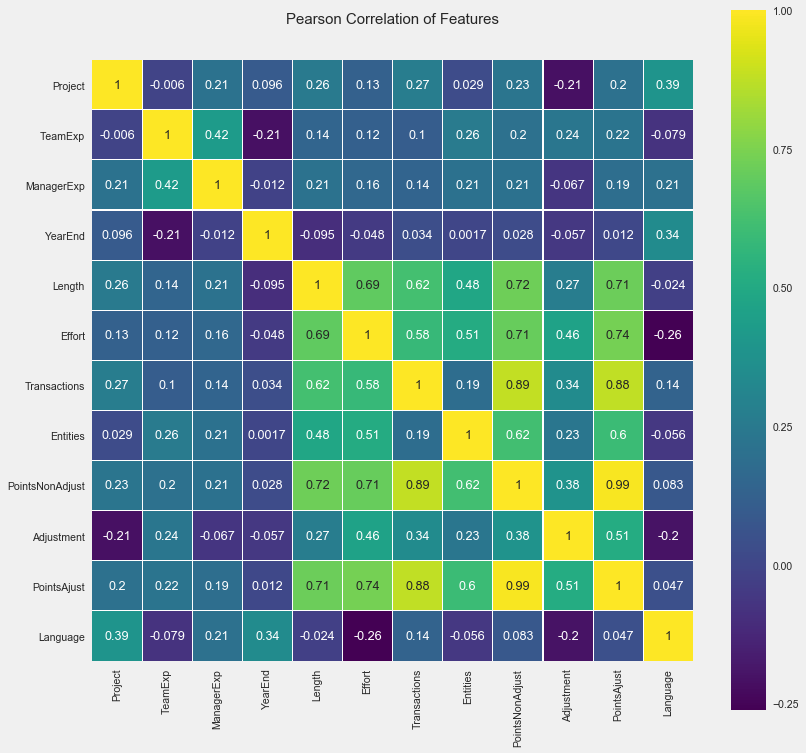

In [18]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_desharnais.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

## Split  train/test data

In [19]:
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']

## Models Costruction

In this study the following algorithms were used: Linear Regression and K-Nearest Neighbors
Regression. The training of the regressors models were performed on 67% of the
instances

## 1) Knn Regression

The K-Nearest Neighbor Regression is a simple algorithm that stores all
available cases and predict the numerical target based on a similarity measure and it’s
been used in a statistical estimation and pattern recognition as non-parametric technique
classifying correctly unknown cases calculating euclidean distance between data points.
In fact our choice by K-Nearest Neighbor Regression was motivated by the absence
of a detailed explanation about how effort attribute value is calculated on Desharnais
dataset. In the K-Nearest Neighbor Regression we choose to specify only 3 neighbors
for k-neighbors queries and uniform weights, that means all points in each neighborhood
are weighted equally.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train) 
print(neigh.score(X_test, y_test))

0.7379861869550943


## 2) Linear Regression


The regression analysis aims to verify the existence of a functional relationship
between a variable with one or more variables, obtaining an equation that explains the
variation of the dependent variable Y, by the variation of the levels of the independent
variables. The training of the Linear Regression model consists of generating a regression
for the target variable Y.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7680074954440712


## 3) Support Vector Machine


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10]}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters)
LinearSVC.fit(X_train, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))
print(LinearSVC.score(X_test, y_test))

Best params hash: {'C': 1, 'kernel': 'linear'}
0.735919788126071


## Results 

   The figure shows the linear model (blue line) prediction is fairly close to Knn model effort prediction (red line), predicting the numerical target based on a similarity measure.
    According to the plot we observe that Linear Regression model (blue line) presents a better performance. Although Knn Regression model (red line) is fairly close to data points, the Linear Regression model shows a smaller mean squared error.  It is possible to observe that the lines of both models present a slight tendency to rise, which justifies their correlation with the increase in effort. Some metrics are also highlighted by the presence of outliers.

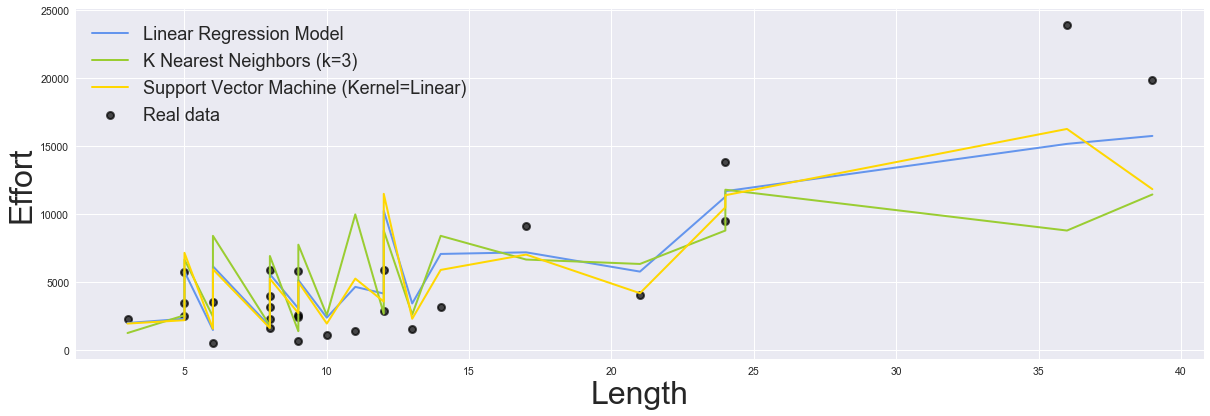

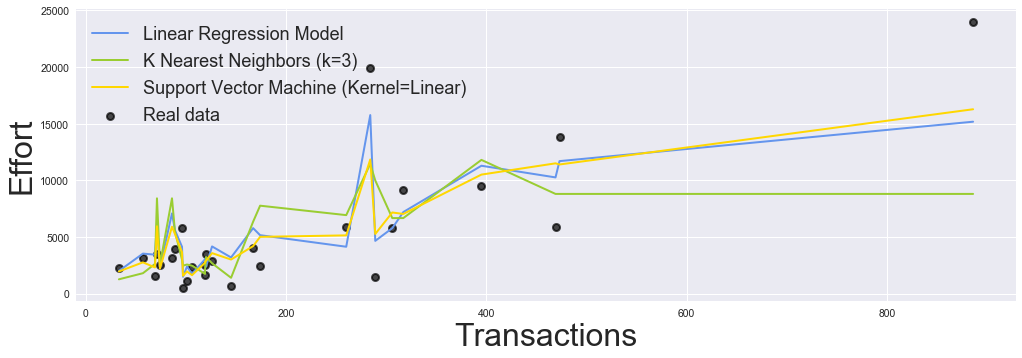

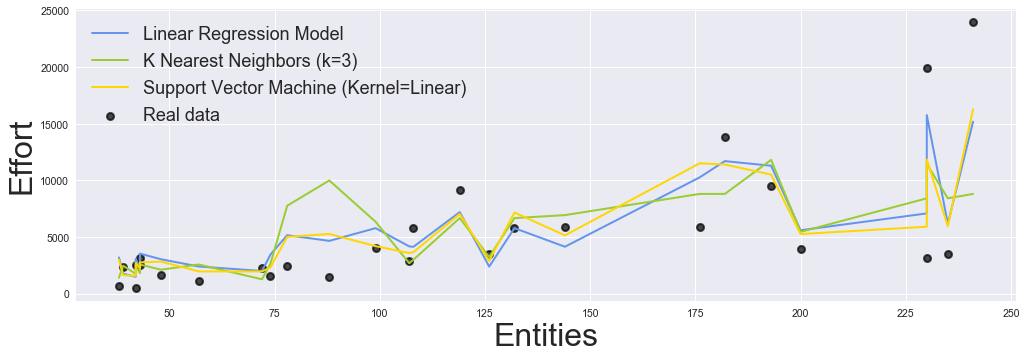

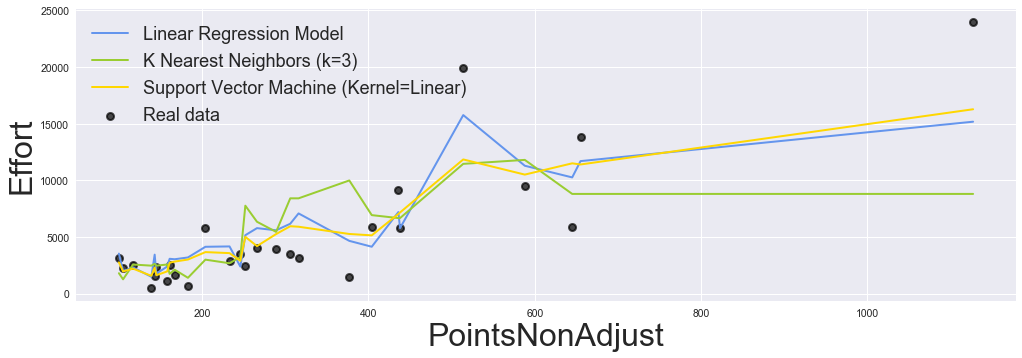

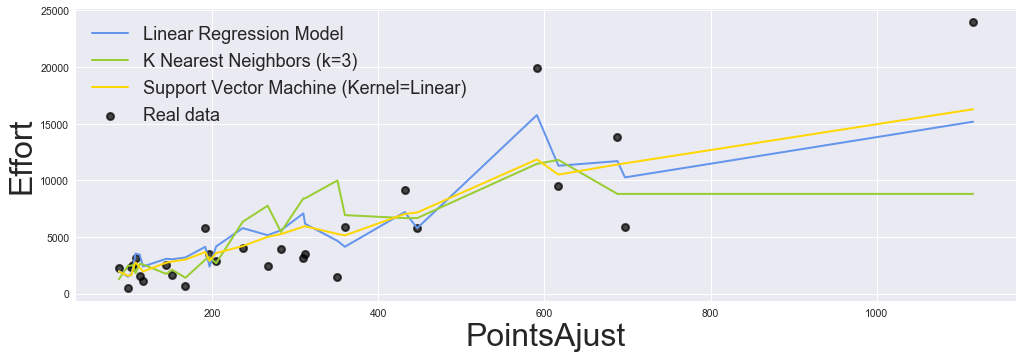

In [23]:

plt.figure(figsize=(18,6))
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.loc']= 'upper left'
plt.rcParams['axes.labelsize']= 32

for i, feature in enumerate(max_corr_features):
   
    # Knn Regression Model 
    xs, ys = zip(*sorted(zip(X_test[feature], neigh.fit(X_train, y_train).predict(X_test))))
    
    # Linear Regression Model 
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))
    
    # Support Vector Machine
    svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[feature], LinearSVC.fit(X_train, y_train).predict(X_test))))

    plt.scatter(X_test[feature], y_test, label='Real data', lw=2,alpha= 0.7, c='k' )
    plt.plot(model_xs, model_ys , lw=2, label='Linear Regression Model', c='cornflowerblue')
    plt.plot(xs, ys , lw=2,label='K Nearest Neighbors (k=3)', c='yellowgreen')
    plt.plot(svc_model_xs, svc_model_ys , lw=2,label='Support Vector Machine (Kernel=Linear)', c='gold')
    
    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()